In [31]:
import pandas as pd
import json
import os

files = os.listdir("results")

idx_file_counter = {

}

json_files = {}
for file in files:
    if file[-4:] != "json":
        continue
    with open("results/"+file, "r") as f:
        df = pd.DataFrame(json.load(f))
        idx = file.split("_")[1][3:]
        df["idx"] = int(idx)

        if idx not in idx_file_counter.keys():
            idx_file_counter[idx] = 1
        else:
            idx_file_counter[idx] += 1

        if idx_file_counter[idx] < 5:
            json_files[file] = df

df = pd.concat(json_files.values(), axis = 0)
df = df[df["idx"] != 5]
df

,tensor_location,criterion_score,layer_name,value_before,value_after,idx
0,"[0, 0, 593]",0.7608,class_token,-0.000760,0.000760,0
1,"[0, 0, 67]",0.7608,class_token,-0.000703,0.000703,0
2,"[0, 0, 690]",0.7608,class_token,-0.000758,0.000758,0
3,"[0, 0, 418]",0.7608,class_token,-0.000655,0.000655,0
4,"[0, 0, 583]",0.7608,class_token,-0.000602,0.000602,0
...,...,...,...,...,...,...
1515,[131],0.7608,heads.head.bias,-0.013511,-0.216172,6
1516,[576],0.7608,heads.head.bias,-0.028518,-0.456286,6
1517,[703],0.7608,heads.head.bias,0.006955,0.000435,6
1518,[361],0.7608,heads.head.bias,0.010427,0.166830,6


In [32]:
# for idx in df['idx'].unique():
#     if len(df[df["idx"] == idx]) > 6080:
#         majority_class = df[df['idx'] == idx]

#         # Downsample to 6080
#         majority_sampled = majority_class.sample(n=6080, random_state=42)

#         # Combine with the rest
#         df = pd.concat([
#             majority_sampled,
#             df[df['idx'] != idx]
#         ])

In [33]:
import numpy as np

df["test_delta"] = 0.7608 - df["criterion_score"]

result = df.groupby("idx").agg(
    criterion_score_mean=("criterion_score", "mean"),
    test_delta_mean=("test_delta", "mean"),
    test_delta_std=("test_delta", "std"),
    critical_error_pct=("criterion_score", lambda x: np.mean(x < 0.1)),
    n_samples=("criterion_score", "count")  # or use any column
)
display(result)

result.to_latex()

,criterion_score_mean,test_delta_mean,test_delta_std,critical_error_pct,n_samples
idx,,,,,
0,0.760655,0.000145,0.008336,0.000000,6080
1,0.176754,0.584046,0.307053,0.739145,6080
3,0.760797,0.000003,0.000183,0.000000,6080
6,0.760128,0.000672,0.020291,0.000822,6080
10,0.760796,0.000004,0.000077,0.000000,6080
15,0.760800,0.000000,0.000000,0.000000,6080
21,0.760800,0.000000,0.000000,0.000000,6080


'\\begin{tabular}{lrrrrr}\n\\toprule\n & criterion_score_mean & test_delta_mean & test_delta_std & critical_error_pct & n_samples \\\\\nidx &  &  &  &  &  \\\\\n\\midrule\n0 & 0.760655 & 0.000145 & 0.008336 & 0.000000 & 6080 \\\\\n1 & 0.176754 & 0.584046 & 0.307053 & 0.739145 & 6080 \\\\\n3 & 0.760797 & 0.000003 & 0.000183 & 0.000000 & 6080 \\\\\n6 & 0.760128 & 0.000672 & 0.020291 & 0.000822 & 6080 \\\\\n10 & 0.760796 & 0.000004 & 0.000077 & 0.000000 & 6080 \\\\\n15 & 0.760800 & 0.000000 & 0.000000 & 0.000000 & 6080 \\\\\n21 & 0.760800 & 0.000000 & 0.000000 & 0.000000 & 6080 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [34]:
df.dtypes

tensor_location     object
criterion_score    float64
layer_name          object
value_before       float64
value_after        float64
idx                  int64
test_delta         float64
dtype: object

In [35]:
df['tensor_location'] = df['tensor_location'].astype(str).astype('|S') # which will by default set the length to the max len it encounters
df['layer_name'] = df['layer_name'].astype('|S') # which will by default set the length to the max len it encounters
df['idx'] = df['idx'].astype('|S') # which will by default set the length to the max len it encounters
df.dtypes

tensor_location       |S16
criterion_score    float64
layer_name            |S62
value_before       float64
value_after        float64
idx                   |S21
test_delta         float64
dtype: object

In [36]:
df = df.sort_values(by = ["layer_name", "idx", "tensor_location", "criterion_score"]).reset_index(drop = True)
df

,tensor_location,criterion_score,layer_name,value_before,value_after,idx,test_delta
0,"b'[0, 0, 107]'",0.7608,b'class_token',0.010280,-0.010280,b'0',0.0000
1,"b'[0, 0, 123]'",0.7608,b'class_token',-0.000993,0.000993,b'0',0.0000
2,"b'[0, 0, 16]'",0.7608,b'class_token',-0.000807,0.000807,b'0',0.0000
3,"b'[0, 0, 179]'",0.7610,b'class_token',0.003212,-0.003212,b'0',-0.0002
4,"b'[0, 0, 198]'",0.7604,b'class_token',-0.015244,0.015244,b'0',0.0004
...,...,...,...,...,...,...,...
42555,"b'[81, 527]'",0.7608,b'heads.head.weight',-0.014841,-0.237464,b'6',0.0000
42556,"b'[838, 544]'",0.7610,b'heads.head.weight',0.025741,0.411856,b'6',-0.0002
42557,"b'[868, 656]'",0.7608,b'heads.head.weight',-0.003590,-0.000224,b'6',0.0000
42558,"b'[903, 296]'",0.7608,b'heads.head.weight',-0.028036,-0.448577,b'6',0.0000


<Axes: xlabel='idx', ylabel='criterion_score'>

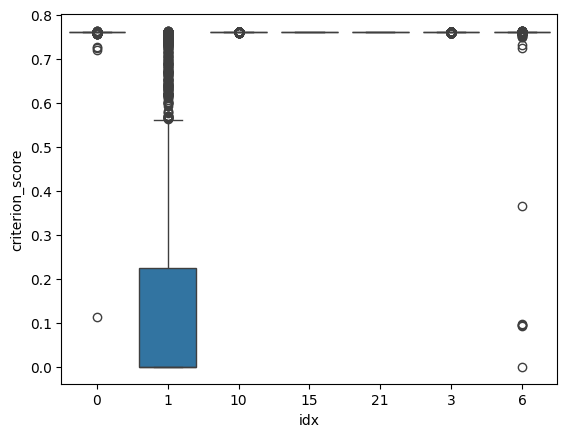

In [37]:
import seaborn as sns

sns.boxplot(data = df, x = "idx", y = "criterion_score")

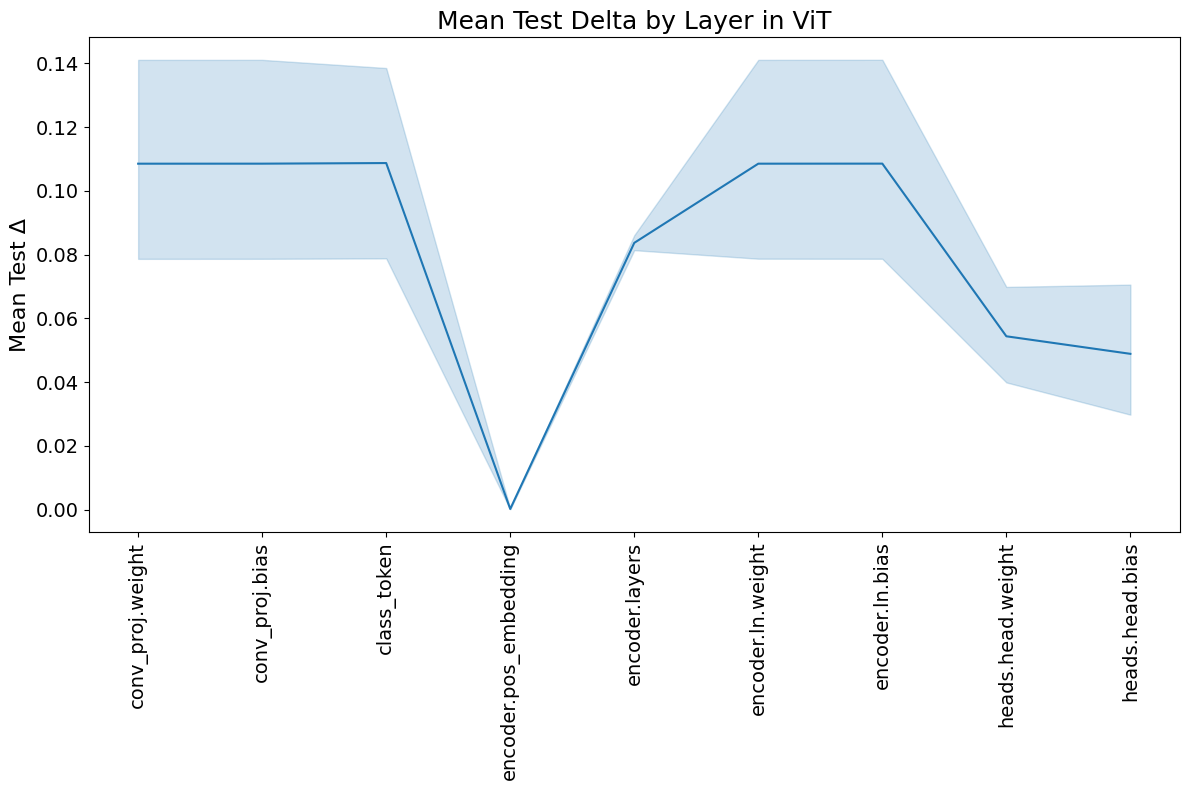

        layer_name_short  mean_test_delta  count  std_test_delta
0       conv_proj.weight         0.108540    280        0.266346
1         conv_proj.bias         0.108549    280        0.266348
2            class_token         0.108739    280        0.266280
3  encoder.pos_embedding         0.000234    280        0.000997
4         encoder.layers         0.083705  40320        0.235487
5      encoder.ln.weight         0.108544    280        0.266230
6        encoder.ln.bias         0.108560    280        0.266344
7      heads.head.weight         0.054401    280        0.133718
8        heads.head.bias         0.048896    280        0.186670


C:\Users\wwden\AppData\Local\Temp\ipykernel_14172\2421923491.py:53: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_table = df.groupby("layer_name_short")["test_delta"].agg(


In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def short_name(x):
    if "class_token" in x:
        return "class_token"

    if "encoder.layers" in x:
        return "encoder.layers"

    if len(x.split(".")) > 2:
        return ".".join([x.split(".")[0], x.split(".")[1], x.split(".")[-1]])
    elif len(x.split(".")) == 2:
        return ".".join([x.split(".")[0], x.split(".")[1]])
    else:
        x

# Create short layer names
df["layer_name_short"] = df["layer_name"].astype(str).apply(short_name)

# # Define custom forward pass order (based on ViT-B_32 architecture)
forward_order = [
    "conv_proj.weight",
    "conv_proj.bias",
    "class_token",
    "encoder.pos_embedding",
    "encoder.layers",
    "encoder.ln.weight",
    "encoder.ln.bias",
    "heads.head.weight",
    "heads.head.bias"
]

# Ensure the column is categorical with the correct order
df["layer_name_short"] = pd.Categorical(df["layer_name_short"], categories=forward_order, ordered=True)
df = df.sort_values("layer_name_short")

# Plot
plt.figure(figsize=(12,8))
sns.lineplot(data=df, x="layer_name_short", y="test_delta")
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("", fontsize=16)
plt.ylabel("Mean Test Δ", fontsize=16)
plt.title("Mean Test Delta by Layer in ViT", fontsize=18)
plt.tight_layout()
plt.savefig("ViT_layer_test_delta.pdf")
plt.show()



agg_table = df.groupby("layer_name_short")["test_delta"].agg(
    mean_test_delta="mean",
    count="size",
    std_test_delta="std"
).reset_index()

print(agg_table)


In [39]:
np.sort(df["layer_name"].unique())

array([b'class_token', b'conv_proj.bias', b'conv_proj.weight',
       b'encoder.layers.encoder_layer_0.ln_1.bias',
       b'encoder.layers.encoder_layer_0.ln_1.weight',
       b'encoder.layers.encoder_layer_0.ln_2.bias',
       b'encoder.layers.encoder_layer_0.ln_2.weight',
       b'encoder.layers.encoder_layer_0.mlp.0.bias',
       b'encoder.layers.encoder_layer_0.mlp.0.weight',
       b'encoder.layers.encoder_layer_0.mlp.3.bias',
       b'encoder.layers.encoder_layer_0.mlp.3.weight',
       b'encoder.layers.encoder_layer_0.self_attention.in_proj_bias',
       b'encoder.layers.encoder_layer_0.self_attention.in_proj_weight',
       b'encoder.layers.encoder_layer_0.self_attention.out_proj.bias',
       b'encoder.layers.encoder_layer_0.self_attention.out_proj.weight',
       b'encoder.layers.encoder_layer_1.ln_1.bias',
       b'encoder.layers.encoder_layer_1.ln_1.weight',
       b'encoder.layers.encoder_layer_1.ln_2.bias',
       b'encoder.layers.encoder_layer_1.ln_2.weight',
       b'en

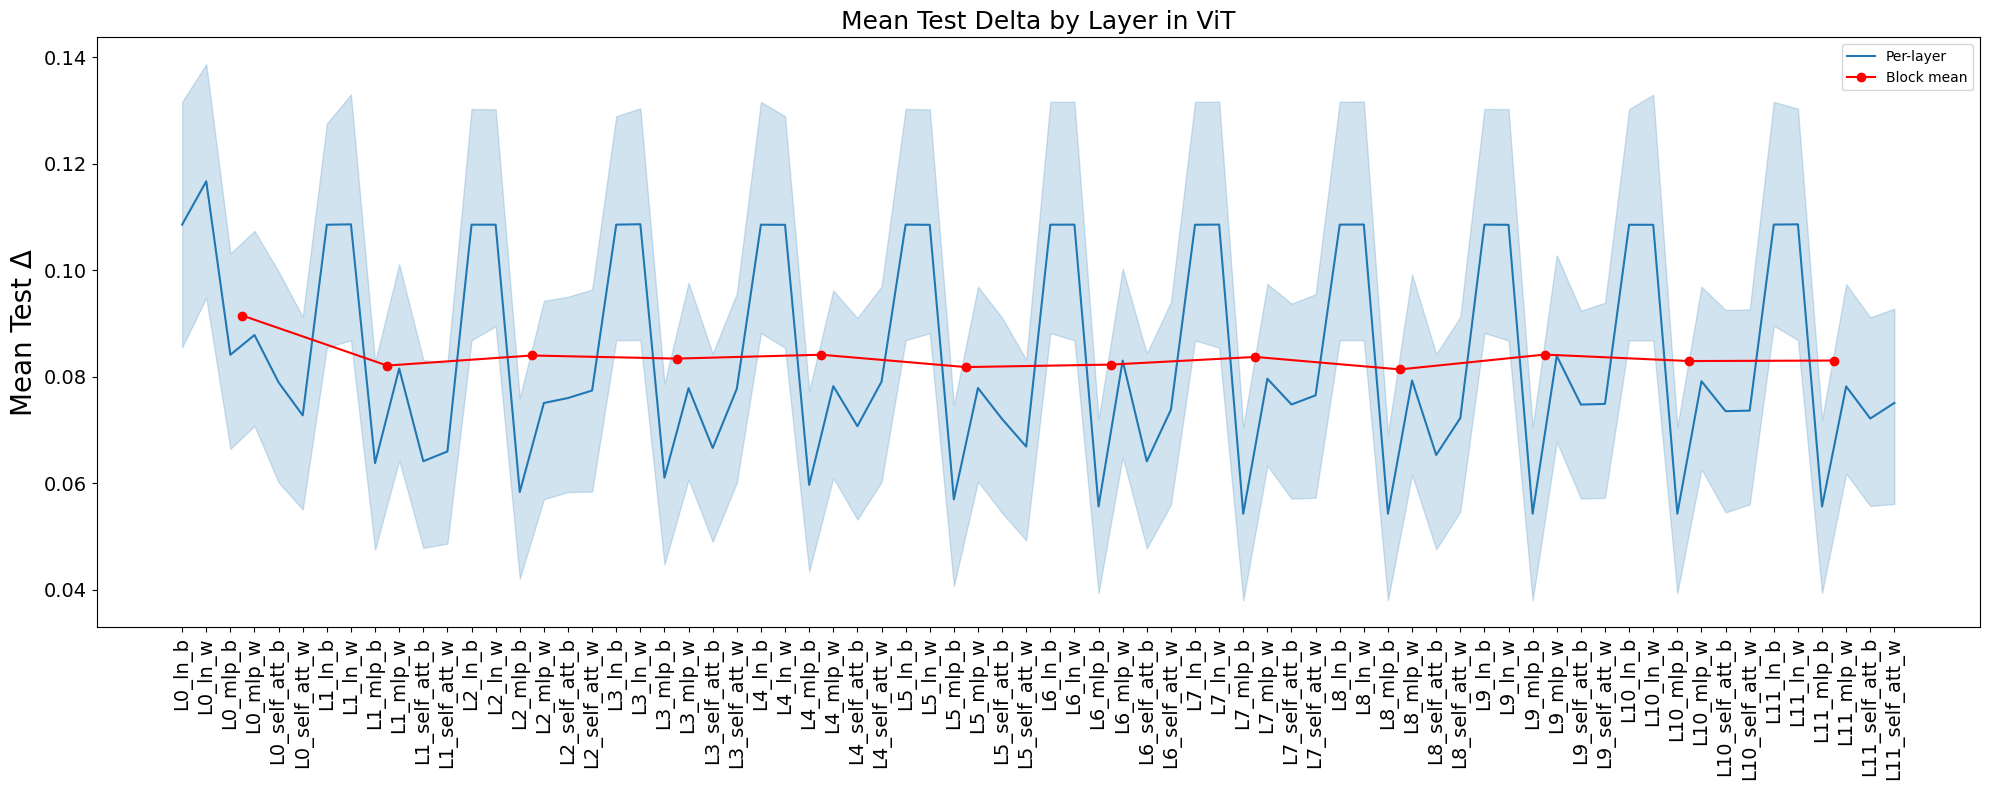

   layer_name_short  mean_test_delta  count  std_test_delta
0           L0_ln_b         0.108565    560        0.266103
1           L0_ln_w         0.116699    560        0.272401
2          L0_mlp_b         0.084120    560        0.238622
3          L0_mlp_w         0.087837    560        0.229251
4     L0_self_att_b         0.078938    560        0.228241
5     L0_self_att_w         0.072747    560        0.220659
6           L1_ln_b         0.108544    560        0.266112
7           L1_ln_w         0.108619    560        0.266087
8          L1_mlp_b         0.063785    560        0.210861
9          L1_mlp_w         0.081542    560        0.227539
10    L1_self_att_b         0.064139    560        0.210773
11    L1_self_att_w         0.065967    560        0.212717
12          L2_ln_b         0.108556    560        0.266107
13          L2_ln_w         0.108549    560        0.266117
14         L2_mlp_b         0.058345    560        0.202478
15         L2_mlp_w         0.075073    

C:\Users\wwden\AppData\Local\Temp\ipykernel_14172\2904822115.py:94: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_table = df_filtered.groupby("layer_name_short")["test_delta"].agg(


In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

not_include = [
    "conv_proj.weight",
    "conv_proj.bias",
    "class_token",
    "encoder.pos_embedding",
    "heads.head.weight",
    "heads.head.bias",
    "encoder.ln.weight",
    "encoder.ln.bias"
]

# Decode layer_name from bytes to str if needed
df["layer_name_str"] = df["layer_name"].apply(lambda x: x.decode() if isinstance(x, bytes) else str(x))

# Filter out excluded layers
df_filtered = df[~df["layer_name_str"].isin(not_include)].copy()

# Shorten layer names for plot
def shorten_name(name):
    layer_num = re.search(r"encoder_layer_(\d+)", name)
    layer_num = f"L{layer_num.group(1)}" if layer_num else "Global"

    if "self_attention" in name:
        submodule = "self_att"
    elif ".mlp." in name:
        submodule = "mlp"
    elif ".ln_" in name:
        submodule = "ln"
    elif "pos_embedding" in name:
        submodule = "pos_emb"
    elif "heads.head" in name:
        submodule = "head"
    else:
        submodule = "other"

    if "weight" in name:
        param = "w"
    elif "bias" in name:
        param = "b"
    else:
        param = "p"

    return f"{layer_num}_{submodule}_{param}"

df_filtered["layer_name_short"] = df_filtered["layer_name_str"].apply(shorten_name)

# Extract block number
def extract_layer_num(name):
    match = re.search(r"encoder_layer_(\d+)", name)
    return int(match.group(1)) if match else -1

df_filtered["layer_num"] = df_filtered["layer_name_str"].apply(extract_layer_num)

# Ordering by block and submodule
order = (
    df_filtered[["layer_name_short", "layer_num"]]
    .drop_duplicates()
    .sort_values(by=["layer_num", "layer_name_short"])
    ["layer_name_short"]
    .tolist()
)

df_filtered["layer_name_short"] = pd.Categorical(df_filtered["layer_name_short"], categories=order, ordered=True)

# Compute block means
block_mean = df_filtered.groupby("layer_num")["test_delta"].mean().reset_index()

# Compute x position (average index of the layers in the block)
block_mean["x"] = block_mean["layer_num"].apply(
    lambda x: sum([i for i, l in enumerate(order) if f"L{x}_" in l]) / sum([1 for l in order if f"L{x}_" in l])
)

# Plot
plt.figure(figsize=(20, 8))
sns.lineplot(data=df_filtered, x="layer_name_short", y="test_delta", label="Per-layer")
plt.plot(block_mean["x"], block_mean["test_delta"], color='red', marker='o', label="Block mean")

plt.xticks(ticks=range(len(order)), labels=order, rotation=90, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("", fontsize=16)
plt.ylabel("Mean Test Δ", fontsize=20)
plt.title("Mean Test Delta by Layer in ViT", fontsize=18)
plt.legend()
plt.tight_layout()
plt.savefig("ViT_layer_test_delta_encoder.pdf")
plt.show()

# Aggregate statistics
agg_table = df_filtered.groupby("layer_name_short")["test_delta"].agg(
    mean_test_delta="mean",
    count="size",
    std_test_delta="std"
).reset_index()

print(agg_table.head(20))


In [41]:
import numpy as np

# Extract submodule from 'layer_name_short'
df_filtered["submodule"] = df_filtered["layer_name_short"].apply(lambda x: "_".join(x.split('_')[1:]))

# Group by 'idx' and 'submodule', then aggregate
agg_block_part = df_filtered.groupby(["submodule"]).agg(
    criterion_score_mean=("criterion_score", "mean"),
    test_delta_mean=("test_delta", "mean"),
    test_delta_std=("test_delta", "std"),
    critical_error_pct=("criterion_score", lambda x: np.mean(x < 0.1)),
    n_samples=("criterion_score", "count")
).reset_index()

print(agg_block_part)

agg_block_part.to_latex()


    submodule  criterion_score_mean  test_delta_mean  test_delta_std  \
0        ln_b              0.652245         0.108555        0.265889   
1        ln_w              0.651554         0.109246        0.266423   
2       mlp_b              0.701436         0.059364        0.203920   
3       mlp_w              0.680661         0.080139        0.220065   
4  self_att_b              0.689704         0.071096        0.220655   
5  self_att_w              0.686969         0.073831        0.224177   

   critical_error_pct  n_samples  
0            0.142857       6720  
1            0.143601       6720  
2            0.078125       6720  
3            0.083482       6720  
4            0.092857       6720  
5            0.096131       6720  


'\\begin{tabular}{llrrrrr}\n\\toprule\n & submodule & criterion_score_mean & test_delta_mean & test_delta_std & critical_error_pct & n_samples \\\\\n\\midrule\n0 & ln_b & 0.652245 & 0.108555 & 0.265889 & 0.142857 & 6720 \\\\\n1 & ln_w & 0.651554 & 0.109246 & 0.266423 & 0.143601 & 6720 \\\\\n2 & mlp_b & 0.701436 & 0.059364 & 0.203920 & 0.078125 & 6720 \\\\\n3 & mlp_w & 0.680661 & 0.080139 & 0.220065 & 0.083482 & 6720 \\\\\n4 & self_att_b & 0.689704 & 0.071096 & 0.220655 & 0.092857 & 6720 \\\\\n5 & self_att_w & 0.686969 & 0.073831 & 0.224177 & 0.096131 & 6720 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [53]:
pos_embed_df = df[df["layer_name_short"] == "encoder.pos_embedding"].sort_values(by = "criterion_score")
pos_embed_df

,tensor_location,criterion_score,layer_name,value_before,value_after,idx,test_delta,layer_name_short,layer_name_str
41770,"b'[0, 25, 17]'",0.7514,b'encoder.pos_embedding',-0.012649,-4.304213e+36,b'1',0.0094,encoder.pos_embedding,encoder.pos_embedding
41771,"b'[0, 26, 747]'",0.7542,b'encoder.pos_embedding',-0.260989,-8.880994e+37,b'1',0.0066,encoder.pos_embedding,encoder.pos_embedding
41769,"b'[0, 24, 459]'",0.7546,b'encoder.pos_embedding',-0.042953,-1.461614e+37,b'1',0.0062,encoder.pos_embedding,encoder.pos_embedding
41761,"b'[0, 13, 699]'",0.7562,b'encoder.pos_embedding',-0.008310,-2.827580e+36,b'1',0.0046,encoder.pos_embedding,encoder.pos_embedding
41778,"b'[0, 33, 223]'",0.7576,b'encoder.pos_embedding',0.041779,1.421654e+37,b'1',0.0032,encoder.pos_embedding,encoder.pos_embedding
...,...,...,...,...,...,...,...,...,...
41789,"b'[0, 45, 383]'",0.7616,b'encoder.pos_embedding',0.005687,1.935270e+36,b'1',-0.0008,encoder.pos_embedding,encoder.pos_embedding
41791,"b'[0, 45, 673]'",0.7616,b'encoder.pos_embedding',0.014883,5.064372e+36,b'1',-0.0008,encoder.pos_embedding,encoder.pos_embedding
41787,"b'[0, 45, 230]'",0.7616,b'encoder.pos_embedding',0.044278,1.506706e+37,b'1',-0.0008,encoder.pos_embedding,encoder.pos_embedding
41790,"b'[0, 45, 580]'",0.7616,b'encoder.pos_embedding',0.354563,1.206514e+38,b'1',-0.0008,encoder.pos_embedding,encoder.pos_embedding


In [56]:
import numpy as np

# Group by 'idx' and 'submodule', then aggregate
pos_embed_df_agg = pos_embed_df.groupby(["idx"]).agg(
    criterion_score_mean=("criterion_score", "mean"),
    test_delta_mean=("test_delta", "mean"),
    test_delta_std=("test_delta", "std"),
    critical_error_pct=("criterion_score", lambda x: np.mean(x < 0.1)),
    n_samples=("criterion_score", "count")
).reset_index()

print(pos_embed_df_agg)

pos_embed_df_agg.to_latex()


     idx  criterion_score_mean  test_delta_mean  test_delta_std  \
0   b'0'              0.760795         0.000005        0.000071   
1   b'1'              0.759180         0.001620        0.002185   
2  b'10'              0.760800         0.000000        0.000000   
3  b'15'              0.760800         0.000000        0.000000   
4  b'21'              0.760800         0.000000        0.000000   
5   b'3'              0.760795         0.000005        0.000032   
6   b'6'              0.760795         0.000005        0.000166   

   critical_error_pct  n_samples  
0                 0.0         40  
1                 0.0         40  
2                 0.0         40  
3                 0.0         40  
4                 0.0         40  
5                 0.0         40  
6                 0.0         40  


"\\begin{tabular}{llrrrrr}\n\\toprule\n & idx & criterion_score_mean & test_delta_mean & test_delta_std & critical_error_pct & n_samples \\\\\n\\midrule\n0 & b'0' & 0.760795 & 0.000005 & 0.000071 & 0.000000 & 40 \\\\\n1 & b'1' & 0.759180 & 0.001620 & 0.002185 & 0.000000 & 40 \\\\\n2 & b'10' & 0.760800 & 0.000000 & 0.000000 & 0.000000 & 40 \\\\\n3 & b'15' & 0.760800 & 0.000000 & 0.000000 & 0.000000 & 40 \\\\\n4 & b'21' & 0.760800 & 0.000000 & 0.000000 & 0.000000 & 40 \\\\\n5 & b'3' & 0.760795 & 0.000005 & 0.000032 & 0.000000 & 40 \\\\\n6 & b'6' & 0.760795 & 0.000005 & 0.000166 & 0.000000 & 40 \\\\\n\\bottomrule\n\\end{tabular}\n"

In [59]:
0.7608 / (1/5000)

3804.0

In [61]:
from torchvision.models import vit_b_32

model = vit_b_32()